# Getting starting with flood detection

This notebook gives you insights on the flood dataset (cf. 1 & 2) and helps you changing its organisation (cf. 3).
To execute the notebook easilyn, make sure to have download the dataset and the notebook in the directory 'flood_project'.
  - Organisation of the flood_project directory:
    - This notebook + the folder 'utils' (with explore.py, load_data.py, params.py)
    - Dataset in the directory 'train/train/**/tiles/...'

1. We will load the images from our local folder.

2. We will explore each type of image (vv, vh, body_water and flood)

3. We will copy our dataset stored in 'train/train/**/tiles/...' into a new directory 'data' with 4 subfolders: 'vv', 'vh', 'water_body_label', 'flood_label'.


## 0. Imports

In [1]:
#!pip install opencv-python

In [2]:
# External imports
import os
from pathlib import Path
import glob
import shutil

In [3]:
%load_ext autoreload
%autoreload 2

In [5]:
# Internal imports
from utils.load_data import load_folder_images, copy_images_to_folder
from utils.explore_data import get_image_basic_info
from utils.params import *

## 1. Load images from our local folder

In [14]:
# Check whether you have the correct train folder path
# If the path is not the location of our folder train, go and update TRAIN_FOLDER_PATH in params.py
print(TRAIN_FOLDER_PATH)

/home/oriane/code/flood_project/train/train


In [15]:
folders_with_images_ = os.listdir(TRAIN_FOLDER_PATH)
print(f'The train folder contains {len(folders_with_images_)} folders with images.\n')
print(f'Names of subfolders with images are like this:')
folders_with_images_[0:2]

The train folder contains 31 folders with images.

Names of subfolders with images are like this:


['northal_20191004t234700', 'northal_20190525t234653']

In [16]:
# Get number of images from 1 type 

image_count = 0
for folder in folders_with_images_:
    
    # Folder with 4 types of images to extract (vv, vh, water_body, flood)
    folder_path = os.path.join('train','train', folder, "tiles",'flood_label')
    image_count = image_count + len(list(Path(folder_path).glob('*.png')))

print(f'There are {image_count} images from each type. In total, we have {image_count*4} images (of 4 different types).')

There are 33405 images from each type. In total, we have 133620 images (of 4 different types).


In [17]:
test_split = 0.2
print(f'We could train on {round((1-test_split)*100)}% of our dataset ({round(image_count * (1-test_split))} images) and test on {round(test_split*100)}% of our dataset ({round(image_count * test_split)} images).')

We could train on 80% of our dataset (26724 images) and test on 20% of our dataset (6681 images).


## 2. Explore the 4 types of images from the first folder

In [19]:
# Initialize lists 
files_vv_ = []
images_vv_ = []
files_vh_ = []
images_vh_ = []
files_water_body_ = [] 
images_water_body_ = []
files_flood_ = []
images_flood_ = []

# Iterate on folders from folders_with_images
for folder in folders_with_images_[0:1]:
    
    # Folder with 4 types of images to extract (vv, vh, water_body, flood)
    folder_path = os.path.join('train','train', folder, "tiles")
    
    message, f_vv_, im_vv_, f_vh_, im_vh_, f_water_body_, im_water_body_, f_flood_, im_flood_ = load_folder_images(folder_path)
    
    if message[0] == '✅':
        files_vv_ = files_vv_ + f_vv_
        images_vv_ = images_vv_ + im_vv_
        files_vh_ = files_vh_ + f_vh_
        images_vh_ = images_vh_ + im_vh_
        files_water_body_ = files_water_body_ + f_water_body_
        images_water_body_ = images_water_body_ + im_water_body_
        files_flood_ = files_flood_ + f_flood_
        images_flood_ = images_flood_ + im_flood_
        
    
    else: 
        break
    
if (len(files_vv_) == len(files_vh_)) and (len(files_vh_) == len(files_water_body_)) and (len(files_water_body_) == len(files_flood_)):
        print('✅✅ Completed full extraction.')
else: 
    print('🚨 WARNING: full extraction not completed' )

✅ Correct extraction for folder train/train/northal_20191004t234700/tiles
✅✅ Completed full extraction.


In [20]:
print(f'{len(images_vv_)} extracted images.')

936 extracted images.


In [21]:
images_dict = {'vv': images_vv_,
               'vh':images_vh_,
               'water_body':images_water_body_,
               'flood':images_flood_}

🔍 Information on vv images:
Shape of 1 image is: (256, 256, 3)
🚨 Images need to be normalized between 0 and 1. Current pixels are between 0 and 255.


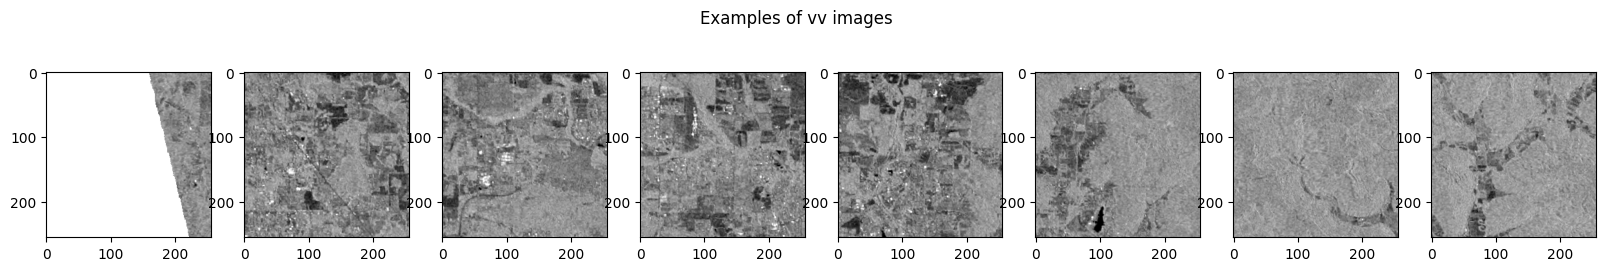

🔍 Information on vh images:
Shape of 1 image is: (256, 256, 3)
🚨 Images need to be normalized between 0 and 1. Current pixels are between 0 and 255.


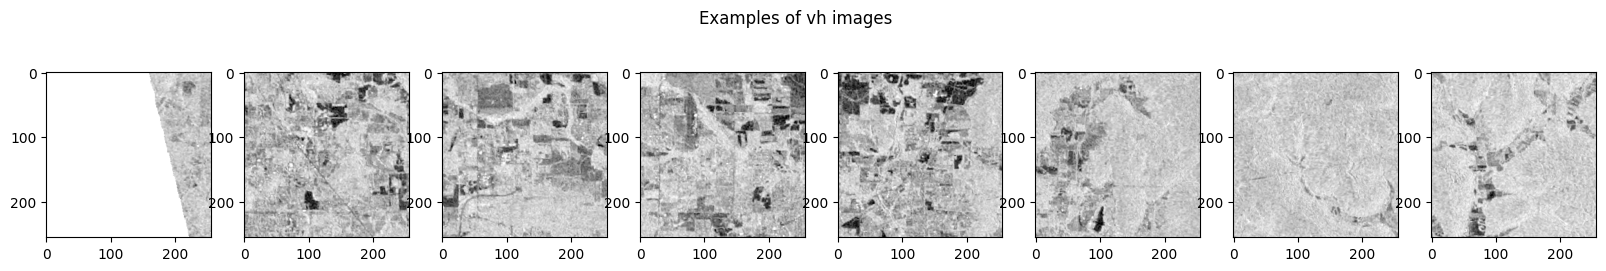

🔍 Information on water_body images:
Shape of 1 image is: (256, 256, 3)
🚨 Images need to be normalized between 0 and 1. Current pixels are between 0 and 255.


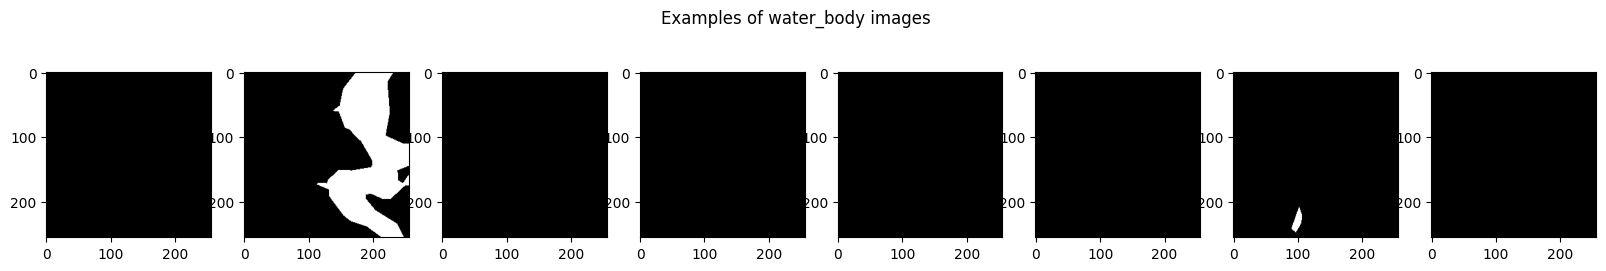

🔍 Information on flood images:
Shape of 1 image is: (256, 256, 3)
🚨 Images need to be normalized between 0 and 1. Current pixels are between 0 and 255.


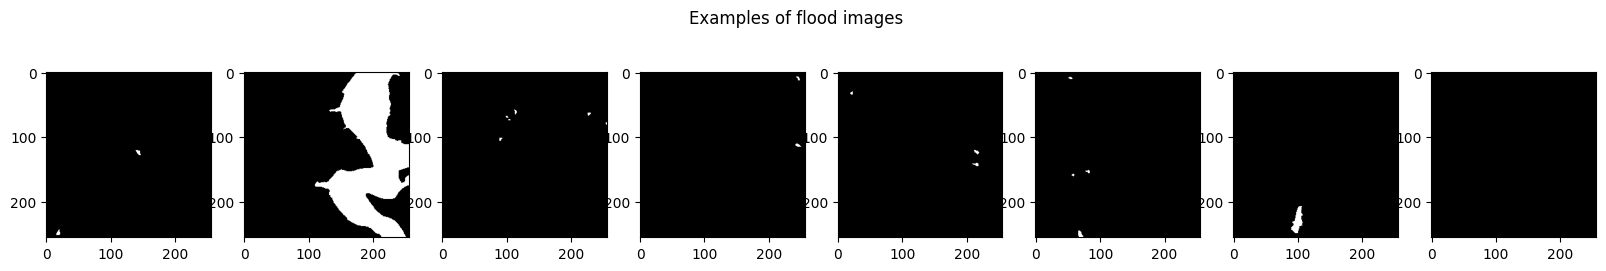

In [22]:
get_image_basic_info(images_dict)

## 3. Copy our data into a directory 'data'
The directory 'data' contains 4 SUB_FOLDERS_ (vv, vh, water_body_label and flood_label), so that we can easily load all the data by batches with tf.keras.

In [122]:
# Creation of directories
! mkdir data
! mkdir data/vv
! mkdir data/vh
! mkdir data/water_body_label
! mkdir data/flood_label

In [133]:
for folder in SUB_FOLDERS_: 
    print(f'copying the folder {folder}')
    copy_images_to_folder(folder)

/home/oriane/code/flood_project/data/vv
copied /home/oriane/code/flood_project/train/train/northal_20191004t234700/tiles/vv/northal_20191004t234700_x-10_y-8_vv.png
copied /home/oriane/code/flood_project/train/train/northal_20191004t234700/tiles/vv/northal_20191004t234700_x-11_y-10_vv.png
copied /home/oriane/code/flood_project/train/train/northal_20191004t234700/tiles/vv/northal_20191004t234700_x-14_y-31_vv.png
copied /home/oriane/code/flood_project/train/train/northal_20191004t234700/tiles/vv/northal_20191004t234700_x-13_y-23_vv.png
copied /home/oriane/code/flood_project/train/train/northal_20191004t234700/tiles/vv/northal_20191004t234700_x-16_y-16_vv.png
copied /home/oriane/code/flood_project/train/train/northal_20191004t234700/tiles/vv/northal_20191004t234700_x-10_y-23_vv.png
copied /home/oriane/code/flood_project/train/train/northal_20191004t234700/tiles/vv/northal_20191004t234700_x-15_y-18_vv.png
copied /home/oriane/code/flood_project/train/train/northal_20191004t234700/tiles/vv/no

**Final check: check whether you have 33 405 files in each of the 4 subfolders!**
- If not, delete the images within the incorrect loaded subfolder and re-run the function copy_images_to_folder for this subfolder.